In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_pickle('ResAss_w_PbSch_Rtngs_Clnd_df.p')

In [4]:
df.head()

,NbrLivingUnits,Address,StreetName,StreetType,DirectionSuffix,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,parcel_number,ExciseTaxNbr,DocumentDate,SalePrice,SellerName,BuyerName,SaleInstrument,SaleReason,SaleWarning,DLB_N,DLB_NaN,DLB_Y,HP_N,HP_NaN,HP_Y,AFL_N,AFL_NaN,AFL_Y,ACL_N,ACL_NaN,ACL_Y,VU_N,VU_NaN,VU_Y,PROP_NAME,LOTSQFT,LEVY_JURIS,ES_ZONE,MS_ZONE,HS_ZONE,Zipcode,ES_Ranking,MS_Ranking,HS_Ranking
0,1,924 27TH AVE 98122,27TH,AVE,,1.0,7,1030,0,0,0,0,0,1230,920,200,6,240,0,0,0,240,5,2,0,4,0,1,2,0,0,0,0,1977,0,3,0,118900-1220,1655357,1998-12-07,144950,BENEFICIAL WASHINGTON INC ...,EDIGHILIGN SHIMELES+ALMAZ BEKELE ...,22,1,,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1189001220,6000.0,SEATTLE,Madrona K-8,Washington,Garfield,98122,4,8,5
1,1,924 27TH AVE 98122,27TH,AVE,,1.0,7,1030,0,0,0,0,0,1230,920,200,6,240,0,0,0,240,5,2,0,4,0,1,2,0,0,0,0,1977,0,3,0,118900-1220,1625521,1998-07-14,137930,STANDARD TRUSTEE SERVICE COMPANY ...,BENEFICIAL WASHINGTON INC ...,18,18,31,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1189001220,6000.0,SEATTLE,Madrona K-8,Washington,Garfield,98122,4,8,5
2,1,919 MARTIN LUTHER KING JR WAY 98122,MARTIN LUTHER KING JR,WAY,,1.0,7,1350,0,0,0,0,0,1350,430,0,0,0,0,50,0,0,5,1,0,4,0,0,1,1,0,0,0,1900,0,3,0,118900-1270,2151226,2005-08-22,250000,BACALZO RUTH P ...,WOLFE TARRY ...,3,1,15,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1189001270,6000.0,SEATTLE,Madrona K-8,Washington,Garfield,98122,4,8,5
3,1,908 31ST AVE S 98144,31ST,AVE,S,2.0,8,1080,0,1080,0,0,0,2700,1080,540,7,0,0,0,0,750,5,2,0,4,0,2,1,0,1,0,1,1954,0,4,0,42404-9005,2866910,2017-05-22,1210000,WU CHIAN ...,YIN JAMES C ...,3,1,,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0424049005,6050.0,SEATTLE,Leschi,Washington,Garfield,98144,4,8,5
4,1,908 31ST AVE S 98144,31ST,AVE,S,2.0,8,1080,0,1080,0,0,0,2700,1080,540,7,0,0,0,0,750,5,2,0,4,0,2,1,0,1,0,1,1954,0,4,0,42404-9005,2357269,2008-07-24,790500,POLLOCK BRUCE KENNETH ...,WU CHIAN+BROWN ALEXANDER SEALEY ...,3,1,,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0424049005,6050.0,SEATTLE,Leschi,Washington,Garfield,98144,4,8,5


In [5]:
# month : The month as January=1, December=12
df['Documentation_YearAge'] = 2017.0 - df['DocumentDate'].dt.year
#df['Documentation_month'] = df['DocumentDate'].dt.month

df.drop(['DocumentDate'], axis=1, inplace=True)

In [6]:
#def documentation_season(df):
#    df['winter'] = (df['Documentation_month'].isin([1,2,12]).astype(int))
#    df['spring'] = (df['Documentation_month'].isin([3,4,5]).astype(int))
#    df['summer'] = (df['Documentation_month'].isin([6,7,8]).astype(int))
#    df['fall'] = (df['Documentation_month'].isin([9,10,11]).astype(int))
#    return df

In [7]:
#df = documentation_season(df)

In [8]:
#df.drop(['Documentation_month'], axis=1, inplace=True)

In [9]:
#df['fall']

In [10]:
#df.head()

In [11]:
#def Doc_month_converter(df):
#    Doc_month_dummies = pd.get_dummies(df.Documentation_month, drop_first=False, prefix='DocMonth')
#    df = pd.concat([df, Doc_month_dummies], axis=1).drop('Documentation_month', axis=1)
#    return df

In [12]:
#df = Doc_month_converter(df)

In [6]:
df['TotalCost'] = df['SalePrice'] + df['AddnlCost']

In [7]:
len(df) #, len(df.shape[1])

71417

In [8]:
def SaleWarning_conv(df):
    df.SaleWarning = df.SaleWarning.apply(lambda x: x.split())
    warningdummies = pd.get_dummies(df.SaleWarning.apply(pd.Series).stack(), prefix='SWarn', drop_first=False).sum(level=0)
    df = df.join(warningdummies, how='left').fillna(0.0)
    df = df.drop('SaleWarning', axis=1)
    return df

In [9]:
df = SaleWarning_conv(df)

In [10]:
def Zipcode_converter(df):
    Zipcode_dummies = pd.get_dummies(df.Zipcode, drop_first=False)
    df = pd.concat([df, Zipcode_dummies], axis=1).drop('Zipcode', axis=1)
    return df

In [11]:
df = Zipcode_converter(df)

In [12]:
def HeatSource_converter(df):
    HeatSource_dummies = pd.get_dummies(df.HeatSource, drop_first=False, prefix='HeatSource')
    df = pd.concat([df, HeatSource_dummies], axis=1).drop('HeatSource', axis=1)
    return df

In [13]:
def HeatSystem_converter(df):
    HeatSystem_dummies = pd.get_dummies(df.HeatSystem, drop_first=False, prefix='HeatSystem')
    df = pd.concat([df, HeatSystem_dummies], axis=1).drop('HeatSystem', axis=1)
    return df

In [14]:
def SqFTLiving_check(df):
    df = df[df.SqFtTotLiving > 500]
    return df

In [15]:
def NumLivingUnits_check(df):
    df = df[df.NbrLivingUnits <= 2]
    return df

In [16]:
df = HeatSource_converter(df)

In [17]:
df = HeatSystem_converter(df)

In [18]:
df = SqFTLiving_check(df)

In [19]:
df = NumLivingUnits_check(df)

In [20]:
df.drop(['Address', 'StreetName', 'StreetType', 'SellerName', 'BuyerName', 'DirectionSuffix', 
         'parcel_number', 'PROP_NAME', 'ES_ZONE', 'MS_ZONE', 'HS_ZONE', 'LEVY_JURIS', 'SalePrice', 
         'AddnlCost', 'ExciseTaxNbr', 'BldgGrade', 'SaleReason', 'SaleInstrument', 'FinBasementGrade'], axis=1, inplace=True)

In [21]:
uplimit = min(df.TotalCost.mean() + df.TotalCost.std()*4, 2000000)
bottomlimit = 100000 # min(abs(df.TotalCost.mean() - df.TotalCost.std()*4), df.TotalCost.min())
print uplimit, bottomlimit

1744229.65165 100000


In [22]:
df = df[(df.TotalCost > bottomlimit) & (df.TotalCost < uplimit)]

In [23]:
df.TotalCost.max(), df.TotalCost.min(), len(df)

(1740000, 100001, 63142)

In [25]:
df.TotalCost.describe()

count    6.314200e+04
mean     3.846499e+05
std      2.521398e+05
min      1.000010e+05
25%      2.000000e+05
50%      3.230000e+05
75%      4.850000e+05
max      1.740000e+06
Name: TotalCost, dtype: float64

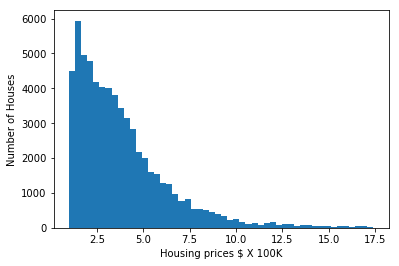

In [26]:
df.TotalCostRed = df.TotalCost/10**5
plt.hist(df.TotalCostRed, bins=50)
plt.xlabel("Housing prices $ X 100K")
plt.ylabel("Number of Houses");

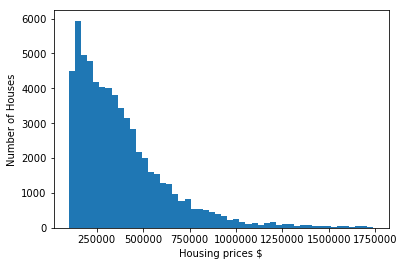

In [27]:
plt.hist(df.TotalCost, bins=50)
plt.xlabel("Housing prices $")
plt.ylabel("Number of Houses")

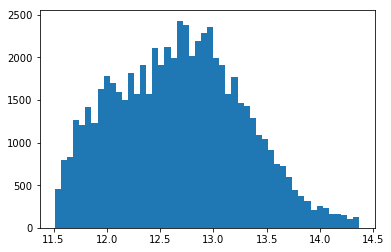

In [28]:
plt.hist(np.log(df.TotalCost), bins=50);

In [34]:
df.head()

,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,DLB_N,DLB_NaN,DLB_Y,HP_N,HP_NaN,HP_Y,AFL_N,AFL_NaN,AFL_Y,ACL_N,ACL_NaN,ACL_Y,VU_N,VU_NaN,VU_Y,LOTSQFT,ES_Ranking,MS_Ranking,HS_Ranking,Documentation_YearAge,TotalCost,SWarn_*,SWarn_1,SWarn_10,SWarn_11,SWarn_12,SWarn_13,SWarn_14,SWarn_15,SWarn_16,SWarn_17,SWarn_18,SWarn_19,SWarn_2,SWarn_20,SWarn_21,SWarn_22,SWarn_23,SWarn_24,SWarn_26,SWarn_28,SWarn_29,SWarn_3,SWarn_30,SWarn_31,SWarn_32,SWarn_33,SWarn_34,SWarn_35,SWarn_36,SWarn_37,SWarn_38,SWarn_39,SWarn_4,SWarn_40,SWarn_41,SWarn_43,SWarn_44,SWarn_45,SWarn_46,SWarn_48,SWarn_5,SWarn_50,SWarn_51,SWarn_52,SWarn_53,SWarn_54,SWarn_55,SWarn_56,SWarn_57,SWarn_6,SWarn_60,SWarn_7,SWarn_8,SWarn_9,SWarn_92,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98177,98178,98199,HeatSource_0,HeatSource_1,HeatSource_2,HeatSource_3,HeatSource_4,HeatSource_5,HeatSource_6,HeatSource_7,HeatSystem_0,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8
0,1,1.0,1030,0,0,0,0,0,1230,920,200,240,0,0,0,240,0,4,0,1,2,0,0,0,0,1977,0,3,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,19.0,144950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1030,0,0,0,0,0,1230,920,200,240,0,0,0,240,0,4,0,1,2,0,0,0,0,1977,0,3,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,19.0,137930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1.0,1350,0,0,0,0,0,1350,430,0,0,0,50,0,0,0,4,0,0,1,1,0,0,0,1900,0,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,12.0,250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,2.0,1080,0,1080,0,0,0,2700,1080,540,0,0,0,0,750,0,4,0,2,1,0,1,0,1,1954,0,4,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,6050.0,4,8,5,0.0,1210000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1080,0,1080,0,0,0,2700,1080,540,0,0,0,0,750,0,4,0,2,1,0,1,0,1,1954,0,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,6050.0,4,8,5,9.0,790500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
y = df.TotalCost
X = df.drop('TotalCost', axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [75]:
FSM1 = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=0)
FSM1.fit(X_train, y_train)
y_predict1 = FSM1.predict(X_test).astype(int)
y_true = y_test.as_matrix()
FSM1.score(X_test, y_test)

0.78658280079905274

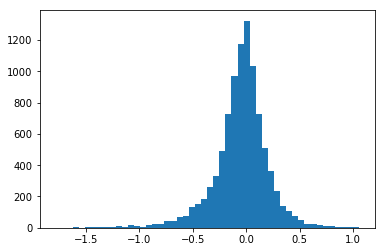

In [76]:
residuals = np.log(y_true) - np.log(y_predict1)
plt.hist(residuals, bins=50);

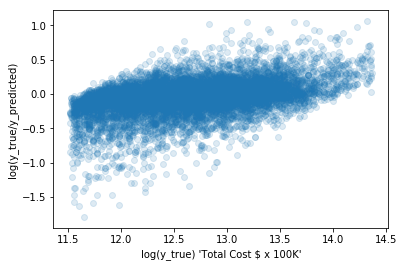

In [77]:
plt.scatter(np.log(y_true), residuals, alpha=0.15)
plt.xlabel("log(y_true) 'Total Cost $ x 100K'")
plt.ylabel("log(y_true/y_predicted)");

In [40]:
#mean_absolute_error(y_true, y_predict1)

In [41]:
#median_absolute_error(y_true, y_predict1)

In [78]:
y_predict1 = FSM1.predict(X_test)

In [79]:
np.median(np.abs((y_true-y_predict1)/y_true)) * 100

12.275573944834759

In [44]:
#np.median(np.abs(1 - y_predict1/y_true))

In [45]:
#y.mean(), y.max(), y.min()

In [46]:
#1 - np.mean(np.abs(y_predict1/y_true))

In [47]:
#np.sqrt(mean_squared_error(y_true, y_predict1))

In [48]:
# y_log = np.log(df.TotalCost)
# X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.15, random_state=42)

In [49]:
# FSM2 = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=0)
# FSM2.fit(X_train_log, y_train_log)
# y_predict2 = FSM2.predict(X_test_log).astype(int)
# y_true_log = y_test_log.as_matrix()
# FSM2.score(X_test_log, y_test_log)

In [50]:
# residuals2 = y_true_log - y_predict2
# plt.hist(residuals2, bins=50);

In [51]:
# median_absolute_error(y_true_log, y_predict2), np.exp(median_absolute_error(y_true_log, y_predict2))

In [52]:
#print sum(abs(residuals))/len(y_predict1) # --> Winner is RF with subsected price range
#print sum(abs(residuals2))/len(y_predict2)
# print sum(abs(residuals3))/len(y_predict3)
# print sum((residuals4))/len(y_predict4)
#print abs(1 - np.exp(sum(abs(residuals))/len(y_predict1)))*100

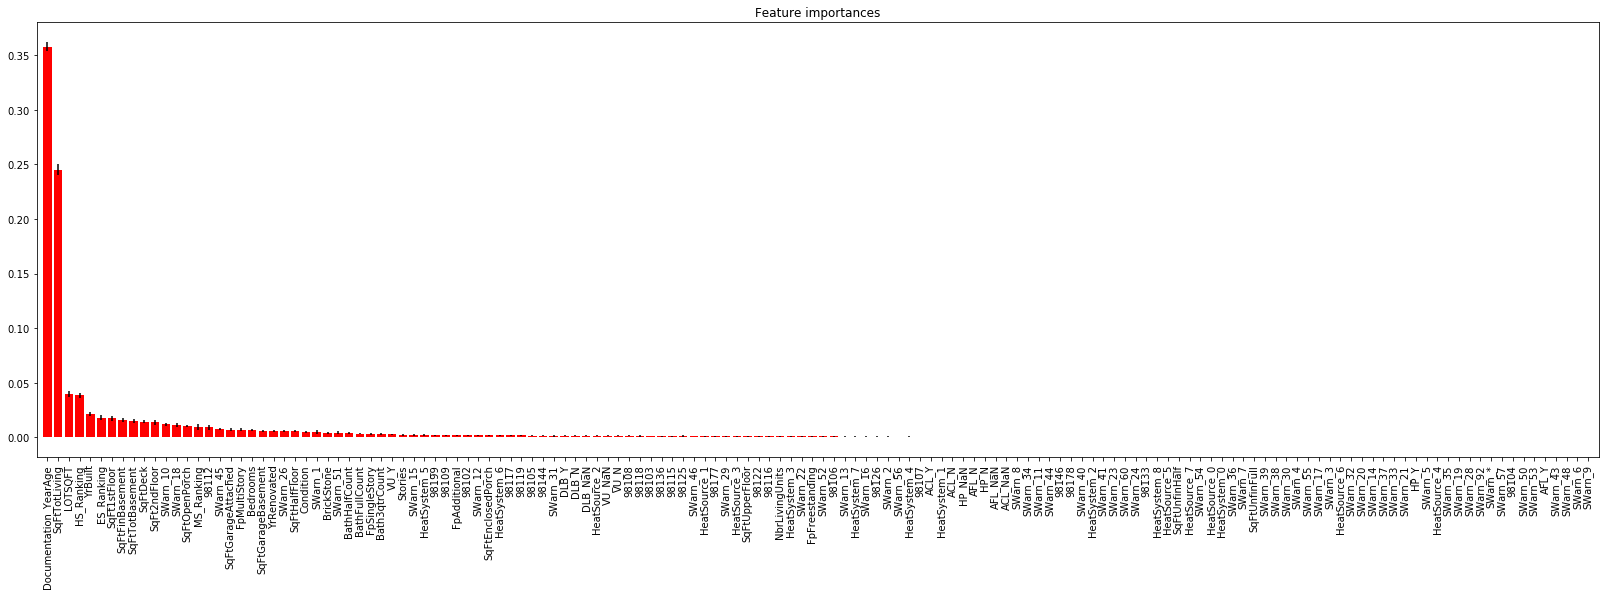

In [94]:
importances = FSM1.feature_importances_
std = np.std([tree.feature_importances_ for tree in FSM1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(28,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show();

ERROR:root:Line magic function `%matplotlib.style` not found.


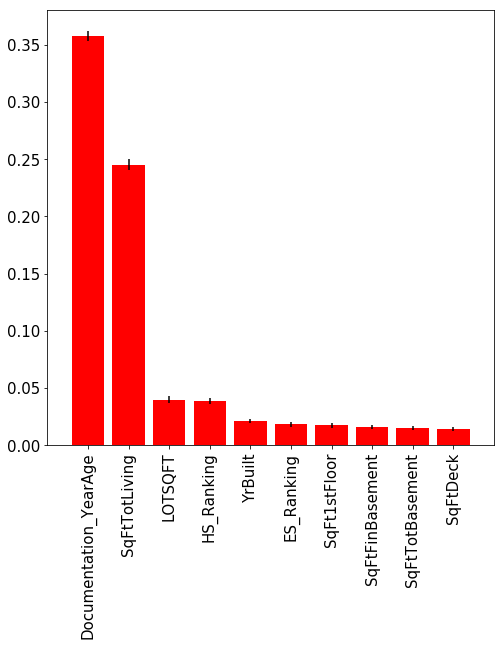

In [97]:
import matplotlib
%matplotlib.style('ggplot')
importances = FSM1.feature_importances_
std = np.std([tree.feature_importances_ for tree in FSM1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,8))
#plt.title("Feature importances", fontsize=15)
plt.bar(range(X.shape[1])[:10], importances[indices][:10],
       color="r", yerr=std[indices][:10], align="center")
plt.xticks(range(X.shape[1])[:10], X.columns[indices][:10],rotation='vertical', fontsize=15)
plt.yticks(fontsize=15)
plt.xlim([-1, 10])
#plt.gca().xaxis.label.set_fontsize(50)
plt.show();

In [55]:
df.drop(['SWarn_13', 'HeatSystem_7', 'SWarn_16', 'SWarn_2','SWarn_56', 'HeatSystem_4', 
         'ACL_Y', 'HeatSystem_1', 'ACL_N', 'HP_NaN', 'AFL_N', 'HP_N', 'AFL_NaN', 'ACL_NaN', 'SWarn_8', 'SWarn_34', 
         'SWarn_11', 'SWarn_44', 'SWarn_40', 'HeatSystem_2', 'SWarn_41', 'SWarn_23', 'SWarn_60', 'SWarn_24',
         'HeatSystem_8', 'HeatSource_5', 'SqFtUnfinHalf','HeatSource_7', 'SWarn_54', 'HeatSource_0','HeatSystem_0', 
         'SWarn_39', 'SWarn_38', 'SWarn_30', 'SWarn_36', 'SWarn_7', 'SqFtUnfinFull', 'SWarn_4', 'SWarn_55', 'SWarn_17','SWarn_3',
         'HeatSource_6', 'SWarn_32','SWarn_20','SWarn_14','SWarn_37','SWarn_33','SWarn_21','HP_Y', 'SWarn_5','HeatSource_4',
         'SWarn_35','SWarn_19', 'SWarn_28', 'SWarn_92', 'SWarn_*', 'SWarn_57', 'SWarn_50','SWarn_53','AFL_Y','SWarn_43',
         'SWarn_43', 'SWarn_48', 'SWarn_6', 'SWarn_9'], axis=1, inplace=True)

In [56]:
df.drop([98126,98107,98146,98178,98133,98104], axis=1, inplace=True)

In [57]:
ys = df.TotalCost
Xs = df.drop('TotalCost', axis=1)

In [58]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.15, random_state=42)

In [59]:
FSMs = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=0)
FSMs.fit(Xs_train, ys_train)
ys_predict = FSMs.predict(Xs_test).astype(int)
ys_true = ys_test.as_matrix()
FSMs.score(Xs_test, ys_test)

0.78667059758804725

In [60]:
residualss = np.log(ys_true) - np.log(ys_predict)

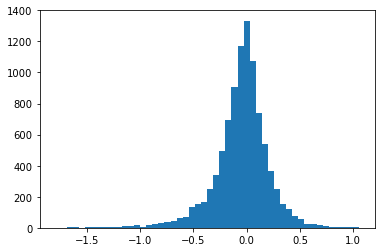

In [61]:
plt.hist(residualss, bins=50);

In [164]:
plt.scatter(np.log(ys_true), residualss, alpha=0.15)
plt.xlabel("log(y_true/y_predicted)")
plt.ylabel("log(y_true) 'Total Cost $ x 100K'");

NameError: name 'ys_true' is not defined

In [64]:
ys_predict = FSMs.predict(Xs_test)

In [65]:
np.median(np.abs((ys_true-ys_predict)/ys_true)) * 100

12.384880943219608

In [70]:
1-np.median(np.abs((ys_true-ys_predict)/ys_true))

0.87615119056780388

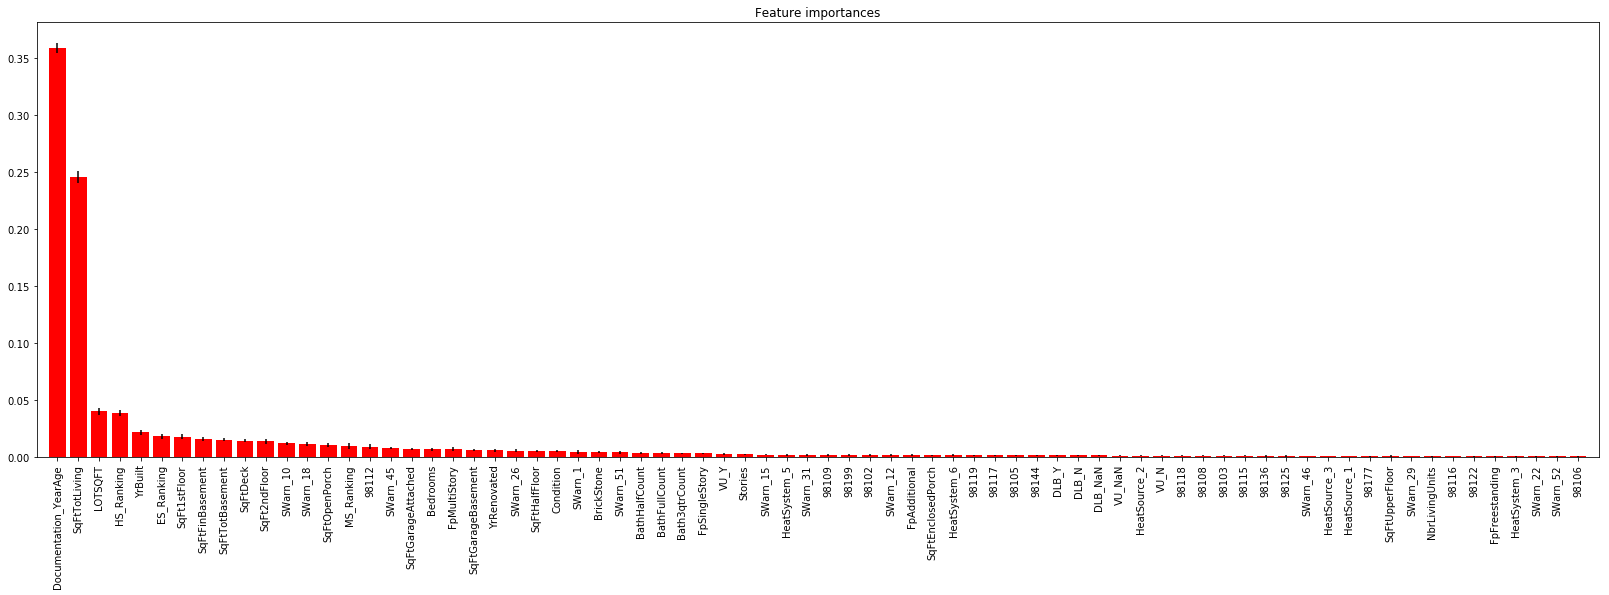

In [66]:
importances = FSMs.feature_importances_
std = np.std([tree.feature_importances_ for tree in FSMs.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(28,8))
plt.title("Feature importances")
plt.bar(range(Xs.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(Xs.shape[1]), Xs.columns[indices],rotation='vertical')
plt.xlim([-1, Xs.shape[1]])
plt.show();

In [67]:
from sklearn.model_selection import GridSearchCV

In [78]:
regressor = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=0)

In [79]:
# TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
# FSMs = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=0)
dt_range = range(1, 11)
params = dict(max_depth=dt_range)

In [80]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """

    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = 1-np.median(np.abs((y_true-y_predict)/y_true))

    # Return the score
    return score

In [81]:
# TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
# We initially created performance_metric using R2_score
from sklearn.metrics import make_scorer
scoring_fnc = make_scorer(performance_metric)

In [82]:
# Create cross-validation sets from the training data
# ShuffleSplit works iteratively compared to KFOLD
# It saves computation time when your dataset grows
# X.shape[0] is the total number of elements
# n_iter is the number of re-shuffling & splitting iterations.
from sklearn.cross_validation import ShuffleSplit
cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.15, random_state = 42)

In [83]:
grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

In [84]:
grid = grid.fit(X, y)

In [85]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [31]:
GridBest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [32]:
GridBest.fit(X_train, y_train)
y_predict = GridBest.predict(X_test).astype(int)
y_true = y_test.as_matrix()
GridBest.score(X_test, y_test)

0.72082174235240426

In [33]:
y_predict = GridBest.predict(X_test)
np.median(np.abs((y_true-y_predict)/y_true)) * 100

16.914987042482643

In [90]:
from sklearn.grid_search import RandomizedSearchCV

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [91]:
cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.15, random_state = 0)
rand = RandomizedSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

In [92]:
rand = rand.fit(X, y)

In [93]:
rand.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

### ElasticNetCV 

In [101]:
from sklearn.linear_model import ElasticNetCV

In [102]:
from sklearn.datasets import make_regression

L1 = 0.1 

Standard Scalar and use pipeline


In [105]:
regr = ElasticNetCV(l1_ratio=0.1, cv=10, n_jobs=-1, random_state=0)

In [106]:
regr.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
       l1_ratio=0.1, max_iter=1000, n_alphas=100, n_jobs=-1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

In [107]:
y_predict = regr.predict(X_test)

In [108]:
y_true = y_test.as_matrix()
regr.score(X_test, y_test)

0.1298957936461077

In [110]:
y_predict = regr.predict(X_test)
np.median(np.abs((y_true-y_predict)/y_true)) * 100

41.603241293157588

In [116]:
regr = ElasticNetCV(l1_ratio=0.5, cv=10, n_jobs=-1, random_state=0)
regr.fit(X_train, y_train)
y_predict = regr.predict(X_test)
y_true = y_test.as_matrix()
regr.score(X_test, y_test)

0.18666548588850096

In [117]:
np.median(np.abs((y_true-y_predict)/y_true)) * 100

39.621551434831495

### Partial Dependence Plots do not work anything else than gradient boosting resressor

In [149]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from __future__ import print_function
print(__doc__)
from mpl_toolkits.mplot3d import Axes3D

Automatically created module for IPython interactive environment


In [34]:
import pickle

In [35]:
model = pickle.load(open('GradientBoostGridSearchFittedModel.pkl'))

In [36]:
predict = model.predict(X_test)

In [37]:
np.median(np.abs((y_true-predict)/y_true)) * 100

11.324027169288611

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


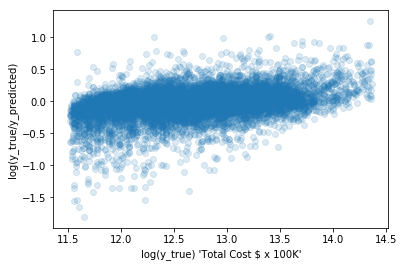

In [38]:
residuals = np.log(y_true) - np.log(predict)
plt.scatter(np.log(y_true), residuals, alpha=0.15)
plt.xlabel("log(y_true) 'Total Cost $ x 100K'")
plt.ylabel("log(y_true/y_predicted)");

In [91]:
importances = model.feature_importances_

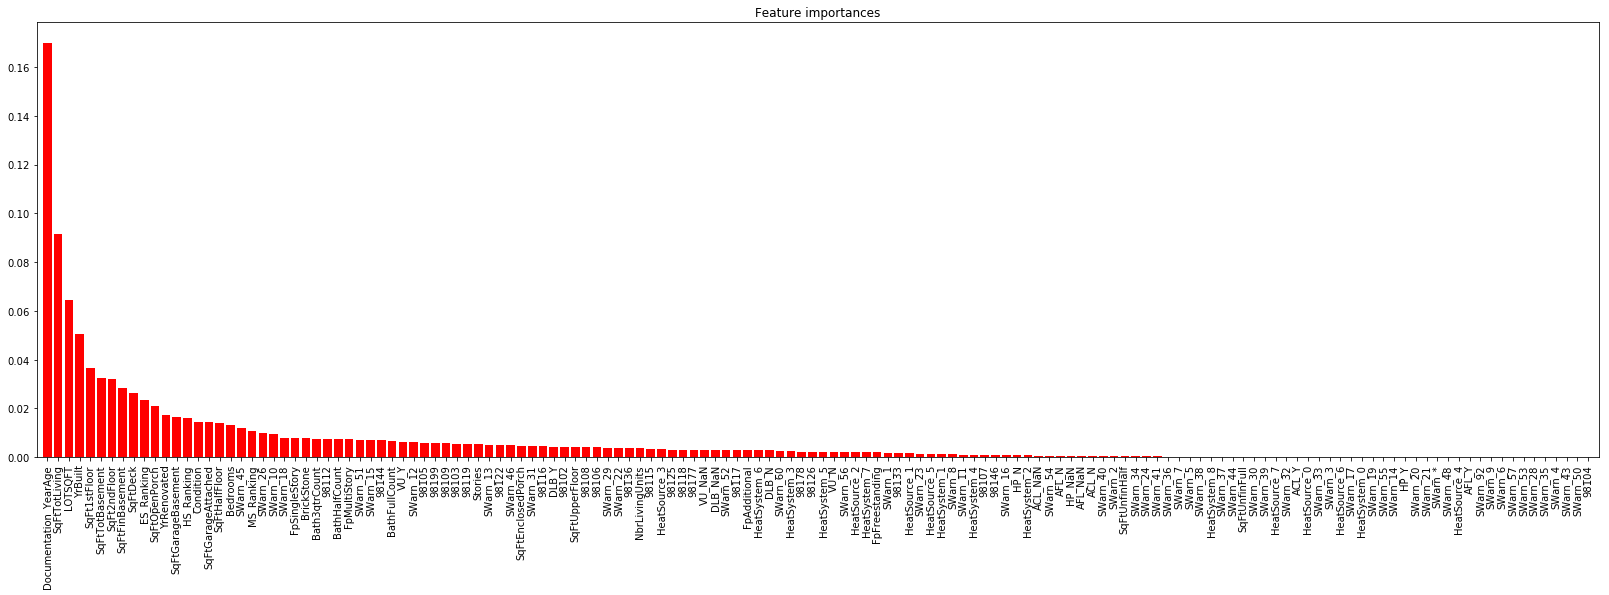

In [92]:
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(28,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show();

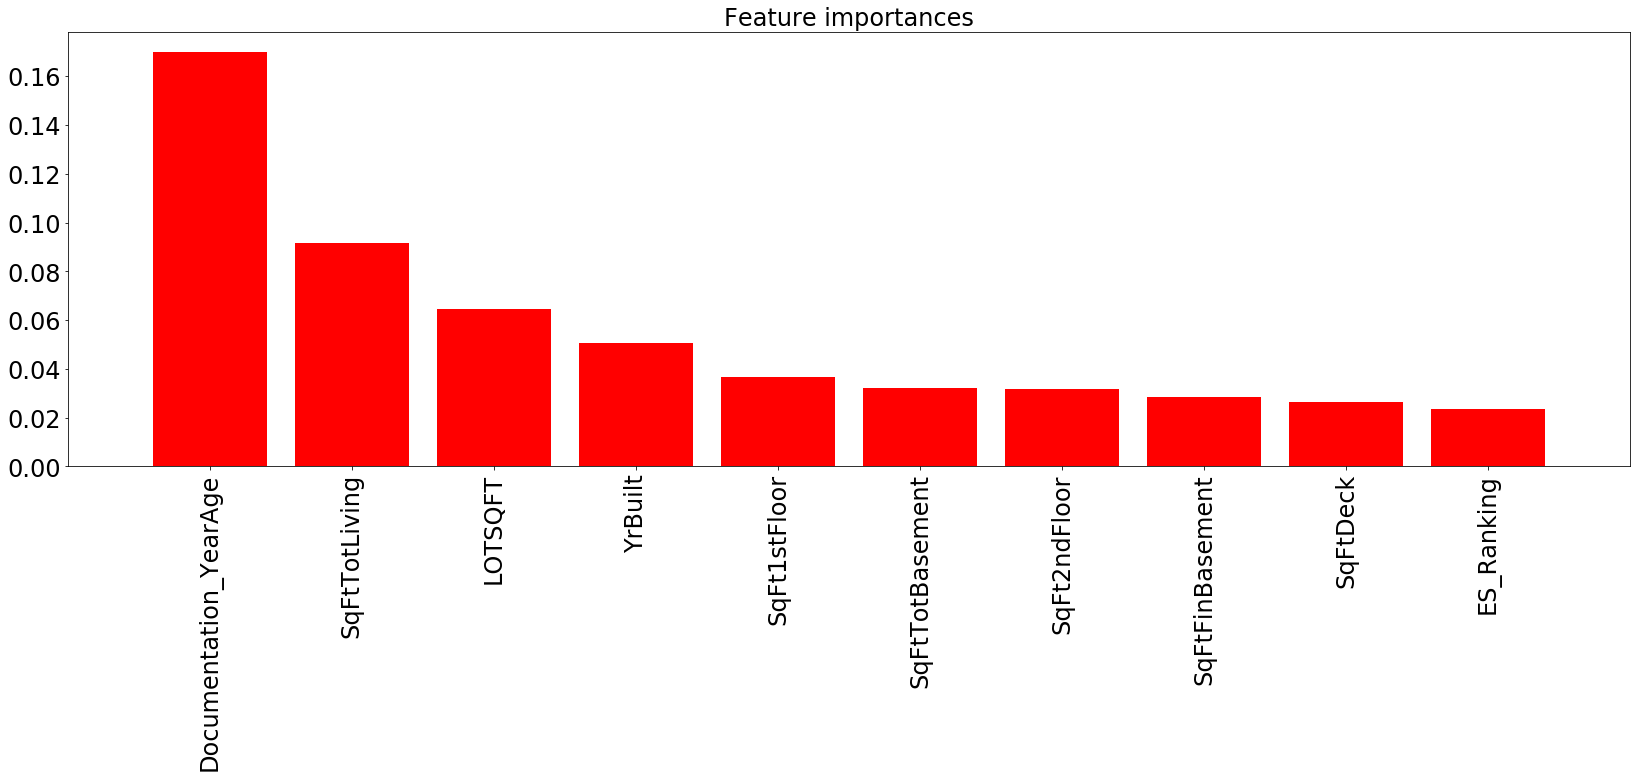

In [93]:
import matplotlib
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(28,8))
plt.title("Feature importances", fontsize=24)
plt.bar(range(X.shape[1])[:10], importances[indices][:10],
       color="r", align="center")
plt.xticks(range(X.shape[1])[:10], X.columns[indices][:10],rotation='vertical', fontsize=24)
plt.yticks(fontsize=24)
plt.xlim([-1, 10])
#plt.gca().xaxis.label.set_fontsize(50)
plt.show();

In [162]:
def new_prediction_matrix(df):
    df['Documentation_YearAge'] = 0
    return df

In [172]:
X_pre = new_prediction_matrix(X)
X_pre.head()

,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,DLB_N,DLB_NaN,DLB_Y,HP_N,HP_NaN,HP_Y,AFL_N,AFL_NaN,AFL_Y,ACL_N,ACL_NaN,ACL_Y,VU_N,VU_NaN,VU_Y,LOTSQFT,ES_Ranking,MS_Ranking,HS_Ranking,Documentation_YearAge,SWarn_*,SWarn_1,SWarn_10,SWarn_11,SWarn_12,SWarn_13,SWarn_14,SWarn_15,SWarn_16,SWarn_17,SWarn_18,SWarn_19,SWarn_2,SWarn_20,SWarn_21,SWarn_22,SWarn_23,SWarn_24,SWarn_26,SWarn_28,SWarn_29,SWarn_3,SWarn_30,SWarn_31,SWarn_32,SWarn_33,SWarn_34,SWarn_35,SWarn_36,SWarn_37,SWarn_38,SWarn_39,SWarn_4,SWarn_40,SWarn_41,SWarn_43,SWarn_44,SWarn_45,SWarn_46,SWarn_48,SWarn_5,SWarn_50,SWarn_51,SWarn_52,SWarn_53,SWarn_54,SWarn_55,SWarn_56,SWarn_57,SWarn_6,SWarn_60,SWarn_7,SWarn_8,SWarn_9,SWarn_92,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98177,98178,98199,HeatSource_0,HeatSource_1,HeatSource_2,HeatSource_3,HeatSource_4,HeatSource_5,HeatSource_6,HeatSource_7,HeatSystem_0,HeatSystem_1,HeatSystem_2,HeatSystem_3,HeatSystem_4,HeatSystem_5,HeatSystem_6,HeatSystem_7,HeatSystem_8
0,1,1.0,1030,0,0,0,0,0,1230,920,200,240,0,0,0,240,0,4,0,1,2,0,0,0,0,1977,0,3,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1030,0,0,0,0,0,1230,920,200,240,0,0,0,240,0,4,0,1,2,0,0,0,0,1977,0,3,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,1.0,1350,0,0,0,0,0,1350,430,0,0,0,50,0,0,0,4,0,0,1,1,0,0,0,1900,0,3,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,6000.0,4,8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,2.0,1080,0,1080,0,0,0,2700,1080,540,0,0,0,0,750,0,4,0,2,1,0,1,0,1,1954,0,4,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,6050.0,4,8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1080,0,1080,0,0,0,2700,1080,540,0,0,0,0,750,0,4,0,2,1,0,1,0,1,1954,0,4,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,6050.0,4,8,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [173]:
y_pre = model.predict(X_pre).astype(int)

In [174]:
Matrix = X_pre
Matrix['TotalCost'] = y_pre

In [175]:
Matrix.to_pickle('GB_Pickled_Matrix.p')

In [44]:
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [45]:
model_1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [50]:
model_1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=10, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [113]:
def column_idxs(df, lst):
    idx_lst = []
    for name in lst:
        idx = df.columns.get_loc(name)
        idx_lst.append(idx)
    return idx_lst

In [114]:
column_idxs(X_train, ['Documentation_YearAge', 'SqFtTotLiving', 'HS_Ranking', 'ES_Ranking'])

[47, 8, 46, 44]

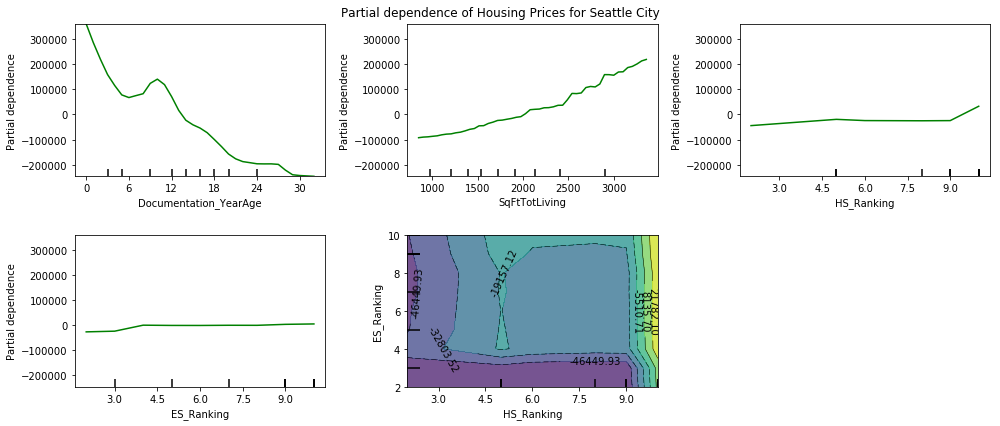

In [137]:
features = [47, 8, 46, 44, (46, 44)]
names = list(X_train.columns.values)

fig, axs = plot_partial_dependence(model_1, X_train, features, feature_names=names, n_jobs=-1, grid_resolution=50, figsize=(14, 6))

fig.suptitle('Partial dependence of Housing Prices for Seattle City')
fig.subplots_adjust(top=0.5)  # tight_layout causes overlap with suptitle

#plt.subplots_adjust(top=0.9)  # tight_layout causes overlap with suptitle

#fig = plt.figure()

# target_feature = (46, 44)
# pdp, axes = partial_dependence(model_1, target_feature,
#                                X=X_train, grid_resolution=50)
# XX, YY = np.meshgrid(axes[0], axes[1])
# Z = pdp[0].reshape(list(map(np.size, axes))).T
# ax = Axes3D(fig)
# surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
#                        cmap=plt.cm.BuPu, edgecolor='k')
# ax.set_xlabel(names[target_feature[0]])
# ax.set_ylabel(names[target_feature[1]])
# ax.set_zlabel('Partial dependence')
#  pretty init view
# ax.view_init(elev=22, azim=122)
# plt.colorbar(surf)
# plt.suptitle('Partial dependence of house value on\n'
#              'HS Rating and ES Rating')
# plt.subplots_adjust(top=0.9)
fig.tight_layout()
plt.show()
#fig.tight_layout()

ValueError: max() arg is an empty sequence

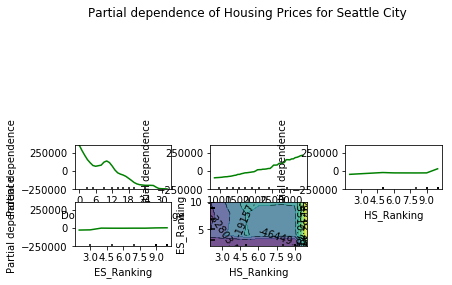

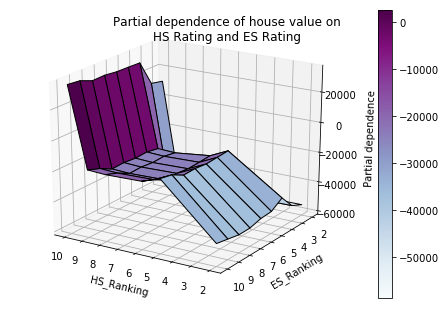

In [148]:
features = [47, 8, 46, 44, (46, 44)]
names = list(X_train.columns.values)

fig, axs = plot_partial_dependence(model_1, X_train, features, feature_names=names, n_jobs=-1, grid_resolution=50)

fig.suptitle('Partial dependence of Housing Prices for Seattle City')
fig.subplots_adjust(top=0.5)  # tight_layout causes overlap with suptitle

fig = plt.figure()

target_feature = (46, 44)
pdp, axes = partial_dependence(model_1, target_feature,
                               X=X_train, grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(names[target_feature[0]])
ax.set_ylabel(names[target_feature[1]])
ax.set_zlabel('\n\nPartial dependence')
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of house value on\n'
             'HS Rating and ES Rating')
plt.subplots_adjust(top=0.9)
fig.tight_layout()
plt.show()
#fig.tight_layout()

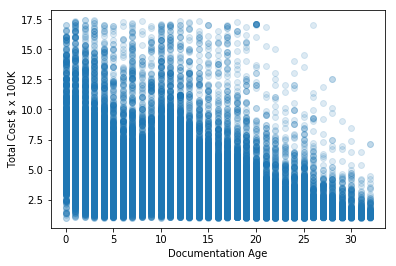

In [152]:
plt.scatter(X['Documentation_YearAge'], y/100000, alpha=0.15)
plt.xlabel("Documentation Age")
plt.ylabel("Total Cost $ x 100K");

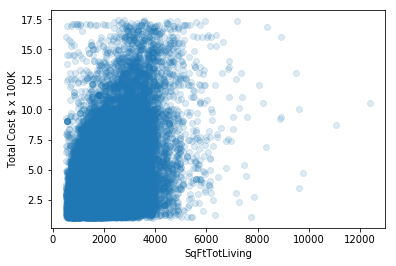

In [154]:
plt.scatter(X['SqFtTotLiving'], y/100000, alpha=0.15)
plt.xlabel("SqFtTotLiving")
plt.ylabel("Total Cost $ x 100K");

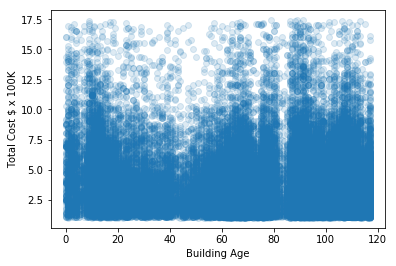

In [155]:
plt.scatter(2017.0-X['YrBuilt'], y/100000, alpha=0.15)
plt.xlabel("Building Age")
plt.ylabel("Total Cost $ x 100K");

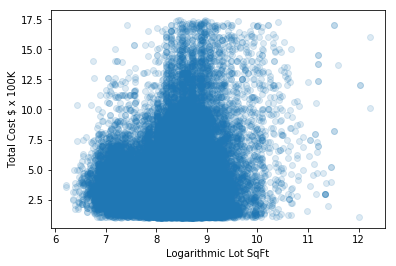

In [156]:
plt.scatter(np.log(X['LOTSQFT']), y/100000, alpha=0.15)
plt.xlabel("Logarithmic Lot SqFt")
plt.ylabel("Total Cost $ x 100K");

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


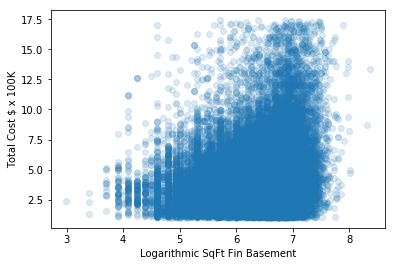

In [157]:
plt.scatter(np.log(X['SqFtFinBasement']), y/100000, alpha=0.15)
plt.xlabel("Logarithmic SqFt Fin Basement")
plt.ylabel("Total Cost $ x 100K");

In [160]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

In [162]:
model = svm.SVR(kernel='linear', C=1)

In [163]:
model.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [165]:
svm1_predict = model.predict(X_test)

In [167]:
y_true = y_test.as_matrix()

In [168]:
np.median(np.abs((y_true-svm1_predict)/y_true)) * 100 

19.920390032235069

In [219]:
sum(X_train.SqFtTotLiving)/len(X_train.SqFtTotLiving)

1859

In [225]:
def sqft(num):
    if not isinstance(int(num), int):
        output = 1859
    else:
        if int(num) <= 500:
            output = 500
        elif int(num) >=12400:
            output = 12400
        else:
            output = num
    return output

In [226]:
sqft('1000000')

12400

In [231]:
isinstance(int(?), int)

SyntaxError: invalid syntax (<ipython-input-231-7cb0609b266e>, line 1)

In [222]:
int('-1000')

-1000

In [223]:
type('1000')

str

In [233]:
max(X_train.Bedrooms)

34

In [197]:
min(X_train.Bedrooms)

0

In [200]:
isinstance(int('1000'), int)

True